In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
my_data = 'C:\\Users\\VenuGopal\\Downloads\\content.data'

df = pd.read_csv(my_data, header = None)

column_names = [ 'symboling', 'normalized-losses', 'make','fuel-type', 'aspiration', 
                'num-of-doors',  'body-style', 'drive-wheels', 'engine-location', 
                'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                'num-of-cylinders','engine-size', 'fuel-system', 'bore', 'stroke', 
                'compression-ratio', 'horsepower','peak-rpm', 'city-mpg', 'highway-mpg',
                'price' ]

df.columns = column_names

In [112]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [113]:
df = df.replace('?', np.nan)

df = df.dropna(subset=["price", "horsepower"], axis=0)

df['normalized-losses'] = df['normalized-losses'].apply(pd.to_numeric)

avg = df["normalized-losses"].mean()

df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg)

In [114]:
df["normalized-losses"][:5]

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalized-losses, dtype: float64

In [115]:
df['city-mpg'] = 235/df['city-mpg']

df = df.rename(columns={'city-mpg': 'city-L/100 km'})

df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100 km',
       'highway-mpg', 'price'],
      dtype='object')

In [116]:
df['price'] = df['price'].apply(pd.to_numeric)

bins = np.linspace(df['price'].min(), df['price'].max(), 4)

In [117]:
group_names = ['Low', 'Medium', 'High']
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [118]:
df['price-bin'] = pd.cut(df['price'], bins, labels = group_names, include_lowest = True)

df[['price', 'price-bin']].head(10)

,price,price-bin
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
5,15250,Low
6,17710,Low
7,18920,Medium
8,23875,Medium
10,16430,Low


<AxesSubplot:xlabel='price', ylabel='Count'>

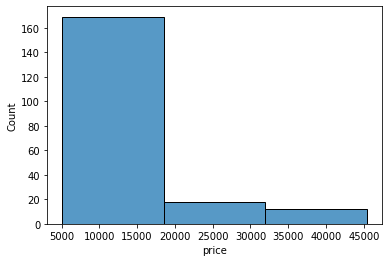

In [119]:
sns.histplot(df['price'], bins = bins, kde = False)

In [120]:
# Categorical variables to Quantitative variables

exp = pd.get_dummies(df['fuel-type'])

dataFrames = [df, exp]

df = pd.concat(dataFrames, axis = 1)

df = df.drop('fuel-type', axis = 1)

In [121]:
df.tail(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100 km,highway-mpg,price,price-bin,diesel,gas
195,-1,74.0,volvo,std,four,wagon,rwd,front,104.3,188.8,...,3.15,9.5,114,5400,10.217391,28,13415,Low,0,1
196,-2,103.0,volvo,std,four,sedan,rwd,front,104.3,188.8,...,3.15,9.5,114,5400,9.791667,28,15985,Low,0,1
197,-1,74.0,volvo,std,four,wagon,rwd,front,104.3,188.8,...,3.15,9.5,114,5400,9.791667,28,16515,Low,0,1
198,-2,103.0,volvo,turbo,four,sedan,rwd,front,104.3,188.8,...,3.15,7.5,162,5100,13.823529,22,18420,Low,0,1
199,-1,74.0,volvo,turbo,four,wagon,rwd,front,104.3,188.8,...,3.15,7.5,162,5100,13.823529,22,18950,Medium,0,1
200,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,10.217391,28,16845,Low,0,1
201,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,12.368421,25,19045,Medium,0,1
202,-1,95.0,volvo,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,13.055556,23,21485,Medium,0,1
203,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,9.038462,27,22470,Medium,1,0
204,-1,95.0,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,12.368421,25,22625,Medium,0,1


In [122]:
# Exploratory Data Analysis

exp = pd.DataFrame(df['drive-wheels'].value_counts())

exp = exp.rename(columns = {'drive-wheels': 'value_counts'})

exp.index.name = 'drive-wheels'

exp

,value_counts
drive-wheels,
fwd,116
rwd,75
4wd,8


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

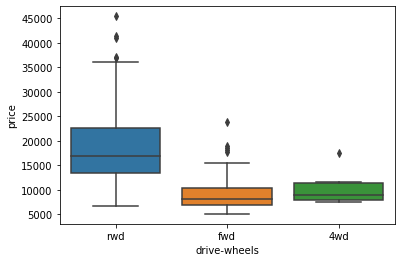

In [123]:
sns.boxplot(x='drive-wheels', y='price', data=df)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

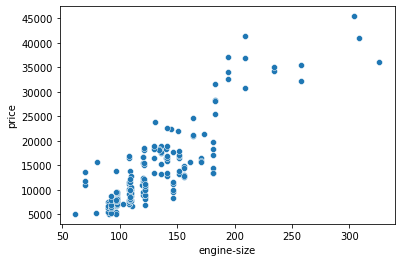

In [124]:
exp = df[['engine-size', 'price']]

sns.scatterplot(x='engine-size', y='price', data = exp)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
# Single Linear Regression (1 predictor variable, 1 target variable)
lm = LinearRegression()

X = df[['highway-mpg']]
Y = df['price']

lm.fit(X, Y)

LinearRegression()

In [127]:
X.shape

(199, 1)

In [128]:
Y_Predict = lm.predict(X)

Y_Predict.shape

(199,)

In [134]:
X = pd.DataFrame(X)
Y_Predict = pd.DataFrame(Y_Predict)

Predictions = pd.concat([X, Y_Predict], axis = 1)

Predictions.columns = ['highway-mpg', 'Predicted Price']

Predictions.dropna()

(199, 28)

In [130]:
# Intercept b0

lm.intercept_

38450.0041882109

In [107]:
# Slope b1

lm.coef_

array([-821.50472215])

In [138]:
# Multiple Linear Regression (More than 1 predictor variable, 1 Continous target variable)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Y = df['price']

lm.fit(X, Y)

preds = lm.predict(X)

In [139]:
lm.intercept_

-15700.573979039274

In [141]:
lm.coef_

array([53.27878556,  4.66217408, 82.22948394, 35.5175845 ])

In [142]:
# Pipelines

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.train(X['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'], Y)

pred = pipe.predict(X['horsepower', 'curb-weight', 'engine-size', 'highway-mpg'])

# X => Normalization => Polynomial Transformation => Linear Regression